### Multilayer perceptron with 50 features

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.2.0


In [3]:
import pandas as pd


In [4]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [5]:
#import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
# Read the dataset
data = pd.read_csv("./data_top50_dfeatures.csv")

In [6]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140842, 50), (19868, 50), (140842,), (19868,))

In [10]:
from tensorflow.keras.layers import Dense,Input,Activation,Dropout
from tensorflow.keras import Model
from tensorflow.keras import Sequential
import random as rn
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import datetime

In [11]:
tf.__version__

'2.2.0'

In [12]:
num_classes = 2

In [11]:
data.shape

(99340, 51)

In [13]:
from tensorflow.keras.layers import PReLU

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model4():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(50,), name='input_layer'),
        Dense(64, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [27]:
# epochs = 300, learning_rate=0.01, dropout=0.15, batch_size=64
model7 = create_model4()
model7.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model7.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                3264      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [28]:
model7.fit(X_train, y_train, epochs=300, validation_data=(X_test,y_test),
           batch_size=64)

Epoch 1/300
2201/2201 [==============================] - 2s 874us/step - loss: 0.1401 - accuracy: 0.8150 - val_loss: 0.1596 - val_accuracy: 0.7865
Epoch 2/300
2201/2201 [==============================] - 2s 840us/step - loss: 0.1165 - accuracy: 0.8450 - val_loss: 0.1335 - val_accuracy: 0.8330
Epoch 3/300
2201/2201 [==============================] - 2s 831us/step - loss: 0.1137 - accuracy: 0.8491 - val_loss: 0.1350 - val_accuracy: 0.8284
Epoch 4/300
2201/2201 [==============================] - 2s 822us/step - loss: 0.1123 - accuracy: 0.8513 - val_loss: 0.1195 - val_accuracy: 0.8595
Epoch 5/300
2201/2201 [==============================] - 2s 830us/step - loss: 0.1109 - accuracy: 0.8525 - val_loss: 0.1330 - val_accuracy: 0.8325
Epoch 6/300
2201/2201 [==============================] - 2s 827us/step - loss: 0.1103 - accuracy: 0.8536 - val_loss: 0.1433 - val_accuracy: 0.8156
Epoch 7/300
2201/2201 [==============================] - 2s 811us/step - loss: 0.1095 - accuracy: 0.8557 - val_loss: 0

2201/2201 [==============================] - 2s 826us/step - loss: 0.1029 - accuracy: 0.8658 - val_loss: 0.1228 - val_accuracy: 0.8515
Epoch 57/300
2201/2201 [==============================] - 2s 823us/step - loss: 0.1029 - accuracy: 0.8658 - val_loss: 0.1295 - val_accuracy: 0.8435
Epoch 58/300
2201/2201 [==============================] - 2s 824us/step - loss: 0.1035 - accuracy: 0.8650 - val_loss: 0.1395 - val_accuracy: 0.8254
Epoch 59/300
2201/2201 [==============================] - 2s 820us/step - loss: 0.1032 - accuracy: 0.8661 - val_loss: 0.1336 - val_accuracy: 0.8375
Epoch 60/300
2201/2201 [==============================] - 2s 822us/step - loss: 0.1024 - accuracy: 0.8665 - val_loss: 0.1387 - val_accuracy: 0.8269
Epoch 61/300
2201/2201 [==============================] - 2s 836us/step - loss: 0.1027 - accuracy: 0.8655 - val_loss: 0.1260 - val_accuracy: 0.8466
Epoch 62/300
2201/2201 [==============================] - 2s 818us/step - loss: 0.1024 - accuracy: 0.8668 - val_loss: 0.1349 

2201/2201 [==============================] - 2s 825us/step - loss: 0.1013 - accuracy: 0.8688 - val_loss: 0.1302 - val_accuracy: 0.8431
Epoch 112/300
2201/2201 [==============================] - 2s 839us/step - loss: 0.1017 - accuracy: 0.8678 - val_loss: 0.1263 - val_accuracy: 0.8474
Epoch 113/300
2201/2201 [==============================] - 2s 834us/step - loss: 0.1015 - accuracy: 0.8682 - val_loss: 0.1247 - val_accuracy: 0.8487
Epoch 114/300
2201/2201 [==============================] - 2s 829us/step - loss: 0.1019 - accuracy: 0.8675 - val_loss: 0.1617 - val_accuracy: 0.7894
Epoch 115/300
2201/2201 [==============================] - 2s 820us/step - loss: 0.1013 - accuracy: 0.8684 - val_loss: 0.1294 - val_accuracy: 0.8438
Epoch 116/300
2201/2201 [==============================] - 2s 817us/step - loss: 0.1020 - accuracy: 0.8674 - val_loss: 0.1177 - val_accuracy: 0.8627
Epoch 117/300
2201/2201 [==============================] - 2s 821us/step - loss: 0.1017 - accuracy: 0.8679 - val_loss: 0

2201/2201 [==============================] - 2s 801us/step - loss: 0.1017 - accuracy: 0.8683 - val_loss: 0.1244 - val_accuracy: 0.8501
Epoch 167/300
2201/2201 [==============================] - 2s 809us/step - loss: 0.1013 - accuracy: 0.8690 - val_loss: 0.1458 - val_accuracy: 0.8206
Epoch 168/300
2201/2201 [==============================] - 2s 805us/step - loss: 0.1012 - accuracy: 0.8685 - val_loss: 0.1377 - val_accuracy: 0.8302
Epoch 169/300
2201/2201 [==============================] - 2s 812us/step - loss: 0.1013 - accuracy: 0.8682 - val_loss: 0.1236 - val_accuracy: 0.8514
Epoch 170/300
2201/2201 [==============================] - 2s 808us/step - loss: 0.1010 - accuracy: 0.8689 - val_loss: 0.1225 - val_accuracy: 0.8543
Epoch 171/300
2201/2201 [==============================] - 2s 800us/step - loss: 0.1012 - accuracy: 0.8681 - val_loss: 0.1361 - val_accuracy: 0.8334
Epoch 172/300
2201/2201 [==============================] - 2s 804us/step - loss: 0.1012 - accuracy: 0.8682 - val_loss: 0

2201/2201 [==============================] - 2s 816us/step - loss: 0.1010 - accuracy: 0.8692 - val_loss: 0.1213 - val_accuracy: 0.8561
Epoch 222/300
2201/2201 [==============================] - 2s 840us/step - loss: 0.1007 - accuracy: 0.8691 - val_loss: 0.1422 - val_accuracy: 0.8251
Epoch 223/300
2201/2201 [==============================] - 2s 844us/step - loss: 0.1012 - accuracy: 0.8686 - val_loss: 0.1378 - val_accuracy: 0.8322
Epoch 224/300
2201/2201 [==============================] - 2s 846us/step - loss: 0.1006 - accuracy: 0.8692 - val_loss: 0.1252 - val_accuracy: 0.8522
Epoch 225/300
2201/2201 [==============================] - 2s 811us/step - loss: 0.1007 - accuracy: 0.8697 - val_loss: 0.1346 - val_accuracy: 0.8371
Epoch 226/300
2201/2201 [==============================] - 2s 813us/step - loss: 0.1006 - accuracy: 0.8692 - val_loss: 0.1240 - val_accuracy: 0.8517
Epoch 227/300
2201/2201 [==============================] - 2s 813us/step - loss: 0.1007 - accuracy: 0.8700 - val_loss: 0

2201/2201 [==============================] - 2s 794us/step - loss: 0.1006 - accuracy: 0.8690 - val_loss: 0.1258 - val_accuracy: 0.8490
Epoch 277/300
2201/2201 [==============================] - 2s 803us/step - loss: 0.1010 - accuracy: 0.8694 - val_loss: 0.1332 - val_accuracy: 0.8441
Epoch 278/300
2201/2201 [==============================] - 2s 796us/step - loss: 0.1008 - accuracy: 0.8697 - val_loss: 0.1255 - val_accuracy: 0.8478
Epoch 279/300
2201/2201 [==============================] - 2s 796us/step - loss: 0.1008 - accuracy: 0.8682 - val_loss: 0.1321 - val_accuracy: 0.8401
Epoch 280/300
2201/2201 [==============================] - 2s 796us/step - loss: 0.1003 - accuracy: 0.8699 - val_loss: 0.1346 - val_accuracy: 0.8401
Epoch 281/300
2201/2201 [==============================] - 2s 792us/step - loss: 0.1008 - accuracy: 0.8693 - val_loss: 0.1307 - val_accuracy: 0.8499
Epoch 282/300
2201/2201 [==============================] - 2s 802us/step - loss: 0.1009 - accuracy: 0.8700 - val_loss: 0

In [16]:
loss = model7.history.history['loss']
val_loss = model7.history.history['val_loss']
accuracy = model7.history.history['accuracy']
val_accuracy = model7.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.13645420968532562,
  0.11685752123594284,
  0.11418034136295319,
  0.1124318316578865,
  0.11140816658735275,
  0.11047663539648056,
  0.10989419370889664,
  0.10934236645698547,
  0.10811464488506317,
  0.10754247009754181,
  0.10708144307136536,
  0.10633299499750137,
  0.10648544132709503,
  0.10639816522598267,
  0.10605163127183914,
  0.10593757778406143,
  0.10545283555984497,
  0.10583263635635376,
  0.10578817129135132,
  0.1052938848733902,
  0.10463809221982956,
  0.10516773164272308,
  0.10484547168016434,
  0.10516975075006485,
  0.10461954027414322,
  0.1042192354798317,
  0.10425031185150146,
  0.10454963892698288,
  0.1043291836977005,
  0.10379652678966522,
  0.10397091507911682,
  0.10403759032487869,
  0.10394103825092316,
  0.10369139909744263,
  0.10409421473741531,
  0.10374424606561661,
  0.10346165299415588,
  0.10442951321601868,
  0.10384658724069595,
  0.10406066477298737,
  0.10329262912273407,
  0.10413119196891785,
  0.10362984985113144,
  0.10307294130

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# predict probabilities for test set
yhat_probs = model7.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model7.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy_score = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy_score)
#print('Validation Accuracy: %f' % val_accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

NameError: name 'model7' is not defined

Train: 0.878, Test: 0.842


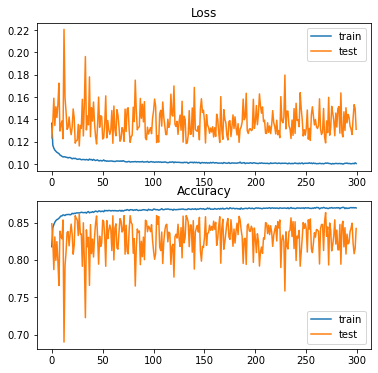

In [18]:
from matplotlib import pyplot
# evaluate the model
_, train_acc = model7.evaluate(X_train, y_train, verbose=0)
_, test_acc = model7.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(6, 6))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [14]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model8():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(50,), name='input_layer'),
        Dense(512, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [16]:
model8 = create_model8()
model8.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 512)               26112     
_________________________________________________________________
p_re_lu (PReLU)              (None, 512)               512       
_________________________________________________________________
drop_out1 (Dropout)          (None, 512)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 513       
Total params: 27,137
Trainable params: 27,137
Non-trainable params: 0
_________________________________________________________________


In [17]:
model8.fit(X_train, y_train, epochs=600, validation_data=(X_test,y_test),
           batch_size=500)

Epoch 1/600
282/282 [==============================] - 1s 3ms/step - loss: 0.3796 - accuracy: 0.6172 - val_loss: 0.3295 - val_accuracy: 0.6646
Epoch 2/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2038 - accuracy: 0.7926 - val_loss: 0.4158 - val_accuracy: 0.5792
Epoch 3/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1914 - accuracy: 0.8058 - val_loss: 0.1596 - val_accuracy: 0.8391
Epoch 4/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1784 - accuracy: 0.8191 - val_loss: 0.2043 - val_accuracy: 0.7932
Epoch 5/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1766 - accuracy: 0.8211 - val_loss: 0.1758 - val_accuracy: 0.8227
Epoch 6/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1746 - accuracy: 0.8232 - val_loss: 0.1518 - val_accuracy: 0.8471
Epoch 7/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1835 - accuracy: 0.8144 - val_loss: 0.1912 - val_accuracy: 0.8075

Epoch 58/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1839 - accuracy: 0.8159 - val_loss: 0.2763 - val_accuracy: 0.7233
Epoch 59/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1947 - accuracy: 0.8052 - val_loss: 0.1724 - val_accuracy: 0.8275
Epoch 60/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1821 - accuracy: 0.8177 - val_loss: 0.1533 - val_accuracy: 0.8466
Epoch 61/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1898 - accuracy: 0.8100 - val_loss: 0.2415 - val_accuracy: 0.7584
Epoch 62/600
282/282 [==============================] - 1s 2ms/step - loss: 0.1861 - accuracy: 0.8137 - val_loss: 0.1851 - val_accuracy: 0.8147
Epoch 63/600
282/282 [==============================] - 1s 2ms/step - loss: 0.1738 - accuracy: 0.8261 - val_loss: 0.2627 - val_accuracy: 0.7372
Epoch 64/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1756 - accuracy: 0.8243 - val_loss: 0.2445 - val_accuracy:

Epoch 115/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1851 - accuracy: 0.8148 - val_loss: 0.2448 - val_accuracy: 0.7552
Epoch 116/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1770 - accuracy: 0.8229 - val_loss: 0.2806 - val_accuracy: 0.7194
Epoch 117/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1914 - accuracy: 0.8085 - val_loss: 0.4678 - val_accuracy: 0.5322
Epoch 118/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1884 - accuracy: 0.8116 - val_loss: 0.2131 - val_accuracy: 0.7867
Epoch 119/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1810 - accuracy: 0.8190 - val_loss: 0.1526 - val_accuracy: 0.8474
Epoch 120/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1832 - accuracy: 0.8167 - val_loss: 0.2725 - val_accuracy: 0.7274
Epoch 121/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1980 - accuracy: 0.8020 - val_loss: 0.3394 - val_ac

282/282 [==============================] - 1s 2ms/step - loss: 0.1880 - accuracy: 0.8119 - val_loss: 0.1472 - val_accuracy: 0.8528
Epoch 172/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2247 - accuracy: 0.7752 - val_loss: 0.1302 - val_accuracy: 0.8698
Epoch 173/600
282/282 [==============================] - 1s 2ms/step - loss: 0.2163 - accuracy: 0.7837 - val_loss: 0.3256 - val_accuracy: 0.6744
Epoch 174/600
282/282 [==============================] - 1s 2ms/step - loss: 0.2131 - accuracy: 0.7869 - val_loss: 0.2121 - val_accuracy: 0.7878
Epoch 175/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1867 - accuracy: 0.8133 - val_loss: 0.2471 - val_accuracy: 0.7529
Epoch 176/600
282/282 [==============================] - 1s 2ms/step - loss: 0.1749 - accuracy: 0.8251 - val_loss: 0.1466 - val_accuracy: 0.8534
Epoch 177/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1989 - accuracy: 0.8011 - val_loss: 0.2386 - val_accuracy: 0.7614

282/282 [==============================] - 1s 2ms/step - loss: 0.1834 - accuracy: 0.8166 - val_loss: 0.1422 - val_accuracy: 0.8578
Epoch 228/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1885 - accuracy: 0.8115 - val_loss: 0.2466 - val_accuracy: 0.7534
Epoch 229/600
282/282 [==============================] - 1s 2ms/step - loss: 0.1955 - accuracy: 0.8045 - val_loss: 0.2223 - val_accuracy: 0.7777
Epoch 230/600
282/282 [==============================] - 1s 2ms/step - loss: 0.1739 - accuracy: 0.8261 - val_loss: 0.2000 - val_accuracy: 0.8000
Epoch 231/600
282/282 [==============================] - 1s 3ms/step - loss: 0.3894 - accuracy: 0.6106 - val_loss: 0.1154 - val_accuracy: 0.8846
Epoch 232/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2144 - accuracy: 0.7856 - val_loss: 0.1960 - val_accuracy: 0.8040
Epoch 233/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1767 - accuracy: 0.8233 - val_loss: 0.1862 - val_accuracy: 0.8138

282/282 [==============================] - 1s 2ms/step - loss: 0.1909 - accuracy: 0.8090 - val_loss: 0.1578 - val_accuracy: 0.8422
Epoch 284/600
282/282 [==============================] - 1s 2ms/step - loss: 0.1897 - accuracy: 0.8103 - val_loss: 0.1341 - val_accuracy: 0.8659
Epoch 285/600
282/282 [==============================] - 1s 2ms/step - loss: 0.2099 - accuracy: 0.7901 - val_loss: 0.3281 - val_accuracy: 0.6719
Epoch 286/600
282/282 [==============================] - 1s 2ms/step - loss: 0.2014 - accuracy: 0.7986 - val_loss: 0.2908 - val_accuracy: 0.7092
Epoch 287/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2025 - accuracy: 0.7975 - val_loss: 0.2380 - val_accuracy: 0.7620
Epoch 288/600
282/282 [==============================] - 1s 2ms/step - loss: 0.2134 - accuracy: 0.7866 - val_loss: 0.4407 - val_accuracy: 0.5592
Epoch 289/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2131 - accuracy: 0.7868 - val_loss: 0.1396 - val_accuracy: 0.8604

282/282 [==============================] - 1s 3ms/step - loss: 0.1897 - accuracy: 0.8103 - val_loss: 0.2335 - val_accuracy: 0.7665
Epoch 340/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2682 - accuracy: 0.7318 - val_loss: 0.1184 - val_accuracy: 0.8816
Epoch 341/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2909 - accuracy: 0.7091 - val_loss: 0.1221 - val_accuracy: 0.8779
Epoch 342/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1817 - accuracy: 0.8183 - val_loss: 0.2322 - val_accuracy: 0.7678
Epoch 343/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2054 - accuracy: 0.7946 - val_loss: 0.3544 - val_accuracy: 0.6456
Epoch 344/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2058 - accuracy: 0.7942 - val_loss: 0.3506 - val_accuracy: 0.6493
Epoch 345/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1929 - accuracy: 0.8071 - val_loss: 0.1336 - val_accuracy: 0.8664

282/282 [==============================] - 1s 3ms/step - loss: 0.1836 - accuracy: 0.8164 - val_loss: 0.1453 - val_accuracy: 0.8547
Epoch 396/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2523 - accuracy: 0.7477 - val_loss: 0.2823 - val_accuracy: 0.7176
Epoch 397/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.7796 - val_loss: 0.2725 - val_accuracy: 0.7275
Epoch 398/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1970 - accuracy: 0.8030 - val_loss: 0.1223 - val_accuracy: 0.8777
Epoch 399/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.7735 - val_loss: 0.2236 - val_accuracy: 0.7764
Epoch 400/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2910 - accuracy: 0.7090 - val_loss: 0.1185 - val_accuracy: 0.8815
Epoch 401/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2311 - accuracy: 0.7689 - val_loss: 0.1493 - val_accuracy: 0.8507

282/282 [==============================] - 1s 3ms/step - loss: 0.1847 - accuracy: 0.8153 - val_loss: 0.2979 - val_accuracy: 0.7021
Epoch 452/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2313 - accuracy: 0.7687 - val_loss: 0.3045 - val_accuracy: 0.6955
Epoch 453/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1879 - accuracy: 0.8121 - val_loss: 0.1908 - val_accuracy: 0.8092
Epoch 454/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2075 - accuracy: 0.7925 - val_loss: 0.1729 - val_accuracy: 0.8271
Epoch 455/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1833 - accuracy: 0.8167 - val_loss: 0.1870 - val_accuracy: 0.8130
Epoch 456/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1781 - accuracy: 0.8219 - val_loss: 0.1848 - val_accuracy: 0.8152
Epoch 457/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1992 - accuracy: 0.8008 - val_loss: 0.1316 - val_accuracy: 0.8684

282/282 [==============================] - 1s 3ms/step - loss: 0.1953 - accuracy: 0.8047 - val_loss: 0.2812 - val_accuracy: 0.7188
Epoch 508/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2444 - accuracy: 0.7556 - val_loss: 0.1235 - val_accuracy: 0.8765
Epoch 509/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2219 - accuracy: 0.7781 - val_loss: 0.1570 - val_accuracy: 0.8430
Epoch 510/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2109 - accuracy: 0.7891 - val_loss: 0.1677 - val_accuracy: 0.8323
Epoch 511/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2064 - accuracy: 0.7935 - val_loss: 0.1336 - val_accuracy: 0.8664
Epoch 512/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2130 - accuracy: 0.7870 - val_loss: 0.1508 - val_accuracy: 0.8492
Epoch 513/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2013 - accuracy: 0.7987 - val_loss: 0.1335 - val_accuracy: 0.8665

282/282 [==============================] - 1s 3ms/step - loss: 0.2224 - accuracy: 0.7775 - val_loss: 0.2818 - val_accuracy: 0.7182
Epoch 564/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2064 - accuracy: 0.7936 - val_loss: 0.2270 - val_accuracy: 0.7730
Epoch 565/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2281 - accuracy: 0.7719 - val_loss: 0.4575 - val_accuracy: 0.5425
Epoch 566/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2270 - accuracy: 0.7730 - val_loss: 0.2826 - val_accuracy: 0.7174
Epoch 567/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2325 - accuracy: 0.7675 - val_loss: 0.3929 - val_accuracy: 0.6071
Epoch 568/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2190 - accuracy: 0.7810 - val_loss: 0.1365 - val_accuracy: 0.8635
Epoch 569/600
282/282 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.7701 - val_loss: 0.1621 - val_accuracy: 0.8379

In [18]:
model8.save('./mlp_50_dfeatures_model8')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./mlp_50_dfeatures_model8/assets


In [19]:
loss = model8.history.history['loss']
val_loss = model8.history.history['val_loss']
accuracy = model8.history.history['accuracy']
val_accuracy = model8.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.37962618470191956,
  0.20383156836032867,
  0.19144032895565033,
  0.1783921718597412,
  0.1765621155500412,
  0.17462341487407684,
  0.1835087537765503,
  0.17751877009868622,
  0.17757226526737213,
  0.17060425877571106,
  0.16980238258838654,
  0.17339295148849487,
  0.1743820160627365,
  0.1742386370897293,
  0.17711816728115082,
  0.17436668276786804,
  0.18132756650447845,
  0.17432641983032227,
  0.17829300463199615,
  0.17208538949489594,
  0.17458148300647736,
  0.1808946430683136,
  0.17032800614833832,
  0.17403782904148102,
  0.17214469611644745,
  0.17794103920459747,
  0.1750916838645935,
  0.17550192773342133,
  0.17565500736236572,
  0.1859995275735855,
  0.18402190506458282,
  0.18274444341659546,
  0.17601417005062103,
  0.17300939559936523,
  0.17512933909893036,
  0.18243618309497833,
  0.18255896866321564,
  0.18335454165935516,
  0.1804712861776352,
  0.20060141384601593,
  0.1714944839477539,
  0.18498484790325165,
  0.17528192698955536,
  0.19289353489875793

Train: 0.811, Test: 0.823


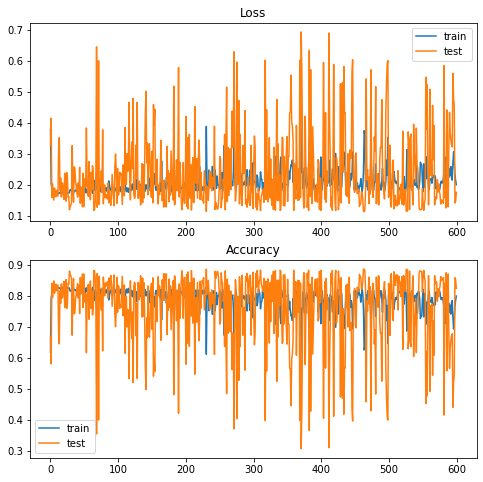

In [20]:
from matplotlib import pyplot
# evaluate the model
_, train_acc = model8.evaluate(X_train, y_train, verbose=0)
_, test_acc = model8.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(8, 8))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# predict probabilities for test set
yhat_probs = model8.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model8.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy_score = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy_score)
#print('Validation Accuracy: %f' % val_accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.822982
Precision: 0.812256
Recall: 0.822982
F1 score: 0.817466
ROC AUC: 0.532551
[[15996  1609]
 [ 1908   355]]
